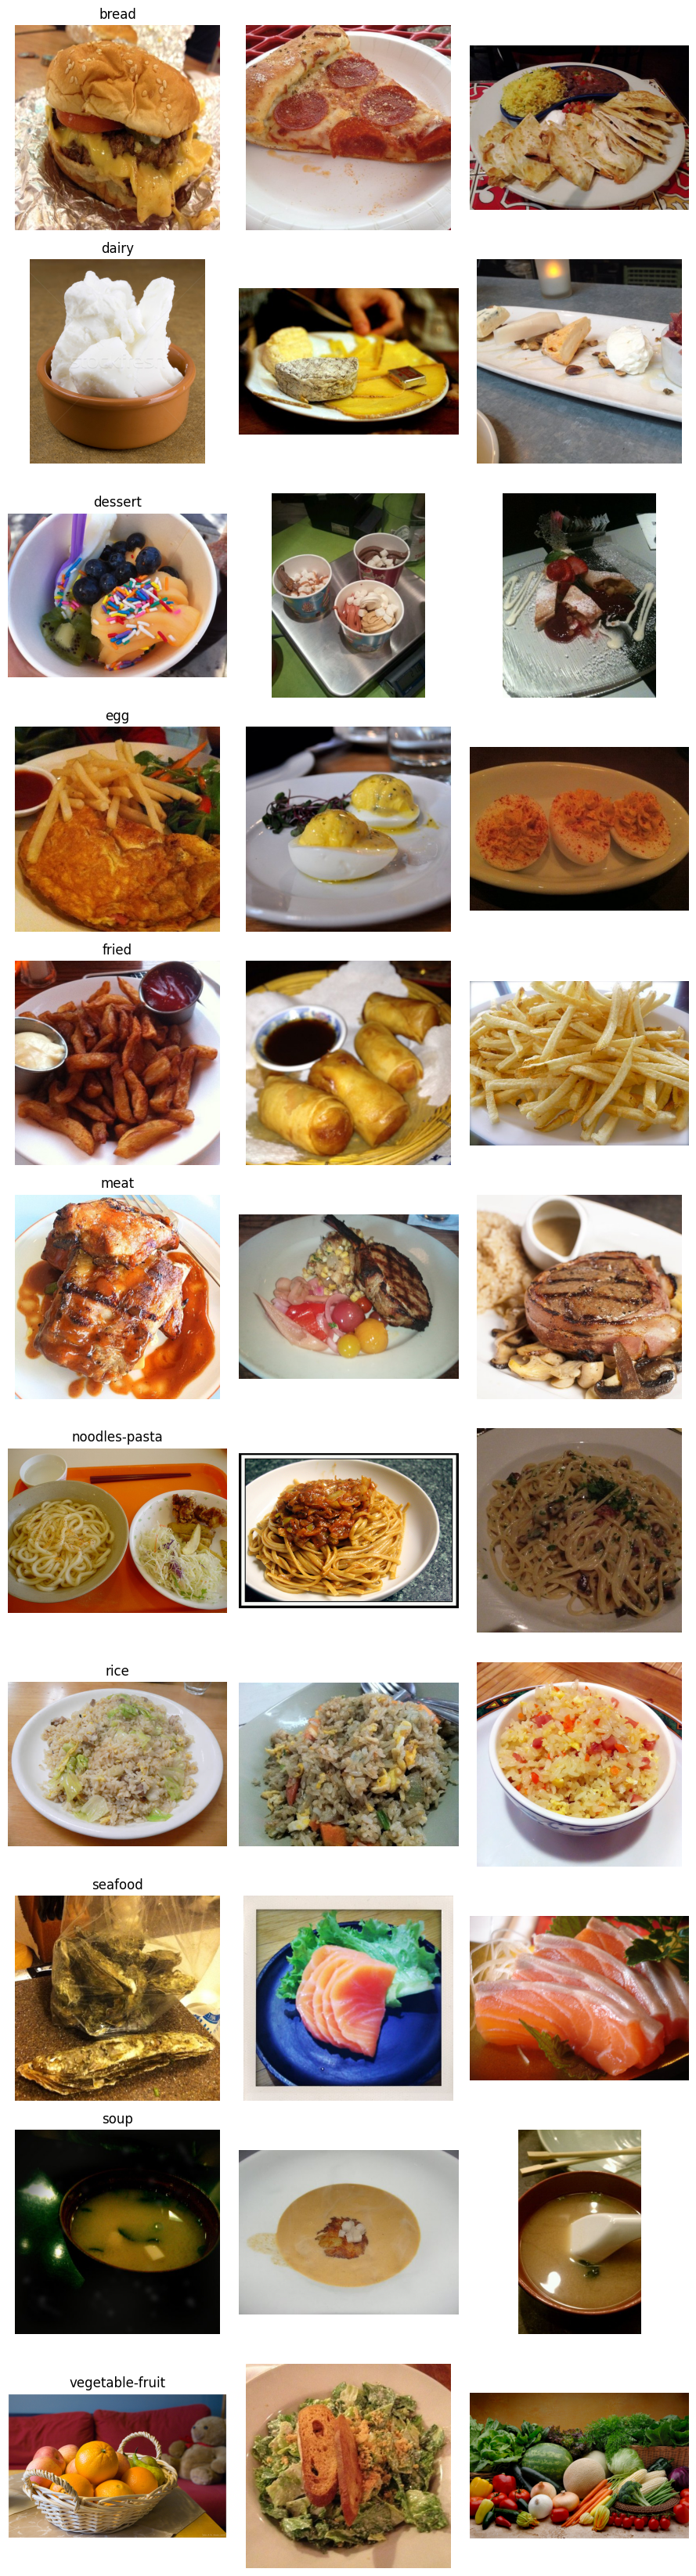

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# Chemin vers le dossier d'entraînement
train_dir = '/home/maxime/Bureau/Developpement/TIP-project/dataset/train'

# Liste des catégories
categories = sorted(os.listdir(train_dir))

# Nombre d'échantillons par catégorie
num_samples = 3

# Créer la figure avec des sous-graphiques
fig, axes = plt.subplots(len(categories), num_samples, figsize=(num_samples * 3, len(categories) * 3))

for i, cat in enumerate(categories):
    cat_path = os.path.join(train_dir, cat)
    images = [f for f in os.listdir(cat_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Sélectionner aléatoirement des images
    selected = random.sample(images, min(num_samples, len(images)))
    
    for j, img_name in enumerate(selected):
        img_path = os.path.join(cat_path, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(cat, fontsize=12)

plt.tight_layout()
plt.show()

Statistiques du dataset d'entraînement:
bread: 1356 images
dairy: 573 images
dessert: 2000 images
egg: 1313 images
fried: 1174 images
meat: 1774 images
noodles-pasta: 587 images
rice: 376 images
seafood: 1202 images
soup: 2000 images
vegetable-fruit: 941 images

Moyenne d'images par catégorie: 1208.7


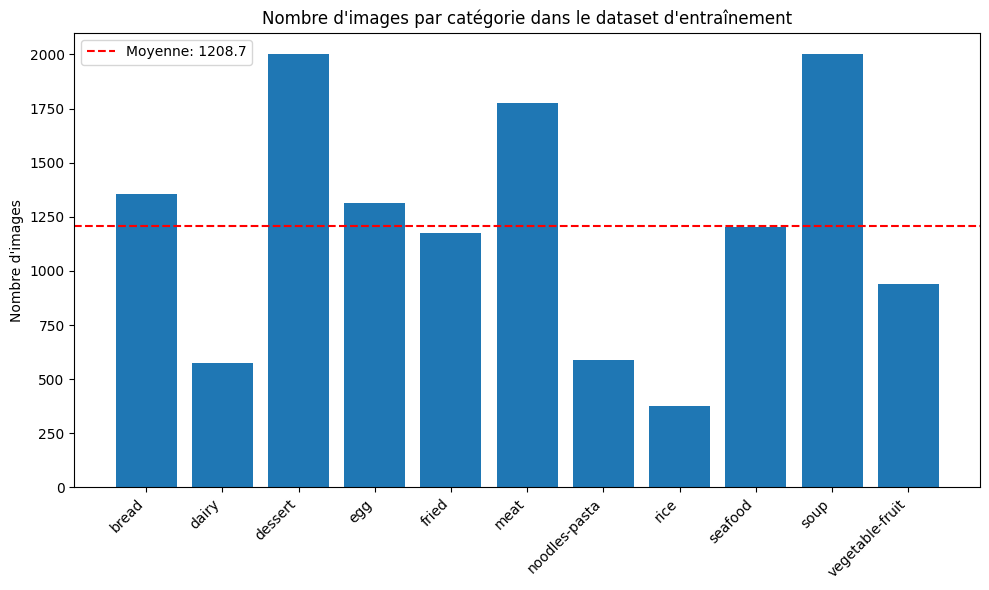

In [3]:
# Statistiques des données
print("Statistiques du dataset d'entraînement:")
counts = []
for cat in categories:
    cat_path = os.path.join(train_dir, cat)
    num_images = len([f for f in os.listdir(cat_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    counts.append(num_images)
    print(f"{cat}: {num_images} images")

average_images = sum(counts) / len(counts)
print(f"\nMoyenne d'images par catégorie: {average_images:.1f}")

# Visualisation du nombre d'images par catégorie
plt.figure(figsize=(10, 6))
plt.bar(categories, counts)
plt.axhline(y=average_images, color='r', linestyle='--', label=f'Moyenne: {average_images:.1f}')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Nombre d\'images')
plt.title('Nombre d\'images par catégorie dans le dataset d\'entraînement')
plt.legend()
plt.tight_layout()
plt.show()

# Gestion du déséquilibre des classes

Le dataset présente un déséquilibre des classes, avec certaines catégories ayant beaucoup plus d'images que d'autres. Cela peut affecter les performances du modèle d'apprentissage automatique.

## Solutions possibles :

### 1. Data Augmentation
Appliquer des transformations aléatoires aux images des classes minoritaires pour augmenter artificiellement leur nombre :
- Rotation, retournement, zoom, translation
- Changement de luminosité/contraste
- Ajout de bruit

Exemple avec torchvision.transforms :

```python
from torchvision import transforms

# Transformations d'augmentation
augmentations = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
])
```

### 2. Sur-échantillonnage (Oversampling)
Dupliquer ou générer des échantillons des classes minoritaires.

### 3. Sous-échantillonnage (Undersampling)
Réduire le nombre d'échantillons des classes majoritaires.

### 4. Pondération des classes
Utiliser des poids dans la fonction de perte pour donner plus d'importance aux classes minoritaires.

### 5. Techniques avancées
- SMOTE (Synthetic Minority Over-sampling Technique)
- BalancedBatchSampler pour l'entraînement

Pour votre dataset, la data augmentation est particulièrement utile car elle permet d'augmenter la diversité des données sans collecter de nouvelles images.